# Create semantic segmentation dataset

This notebook shows how to create a semantic segmentation table from a dataset of images and segmentation masks (grayscale PNG images).

<!-- Tags: [Semantic Segmentation, ADE20k] -->

![img](../images/ade-20-semseg.jpg)

## Project Setup

In [1]:
PROJECT_NAME = "ADE 20k Semantic Segmentation"
DATASET_NAME = "ADE20k_toy_dataset"
TABLE_NAME = "ADE20K-semantic-segmentation"
DOWNLOAD_PATH = "../../transient_data"

## Install dependencies

In [2]:
%pip install 3lc
%pip install git+https://github.com/3lc-ai/3lc-examples.git
%pip install huggingface-hub

Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/3lc-ai/3lc-examples.git to c:\users\gudbrand\appdata\local\temp\pip-req-build-lzv_jub9
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


Note: you may need to restart the kernel to use updated packages.


## Imports

In [3]:
import json
from pathlib import Path

import tlc
from huggingface_hub import hf_hub_download

from tlc_tools.common import download_and_extract_zipfile

## Download the dataset

In [4]:
DATASET_ROOT = (Path(DOWNLOAD_PATH) / "ADE20k_toy_dataset").resolve()

if not DATASET_ROOT.exists():
    print("Downloading data...")
    download_and_extract_zipfile(
        url="https://www.dropbox.com/s/l1e45oht447053f/ADE20k_toy_dataset.zip?dl=1",
        location=DOWNLOAD_PATH,
    )

## Fetch the label map from the Hugging Face Hub

In [5]:
# load id2label mapping from a JSON on the hub
with open(
    hf_hub_download(
        repo_id="huggingface/label-files",
        filename="ade20k-id2label.json",
        repo_type="dataset",
    )
) as f:
    id2label = json.load(f)

categories = list(id2label.values())

In [6]:
value_map = {i + 1: tlc.MapElement(category) for i, category in enumerate(categories)}
value_map[0] = tlc.MapElement("background", display_color="#00000000")  # Set transparent background

## Load the images and segmentation maps





In [7]:
image_paths = list(DATASET_ROOT.glob("**/images/training/*.jpg"))
segmentation_map_paths = list(DATASET_ROOT.glob("**/annotations/training/*.png"))

In [8]:
# Call .to_relative() to ensure aliases are applied
image_paths = [tlc.Url(p).to_relative().to_str() for p in image_paths]
mask_paths = [tlc.Url(p).to_relative().to_str() for p in segmentation_map_paths]
print(image_paths[0])

C:/Project/notebook-examples/transient_data/ADE20k_toy_dataset/images/training/ADE_train_00000001.jpg


## Write the instance segmentation masks to a table

In [9]:
table = tlc.Table.from_dict(
    data={
        "image": image_paths,
        "mask": mask_paths,
    },
    structure=(tlc.PILImage("image"), tlc.SegmentationPILImage("mask", classes=value_map)),
    table_name=TABLE_NAME,
    dataset_name=DATASET_NAME,
    project_name=PROJECT_NAME,
)

In [10]:
image, mask = table[0]

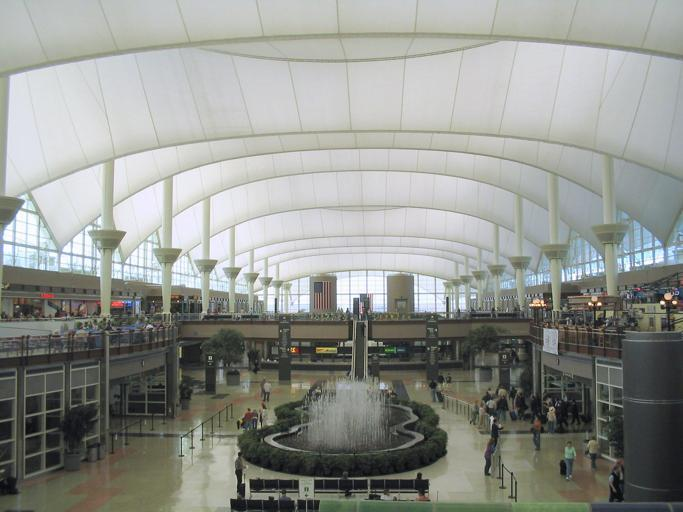

In [11]:
image

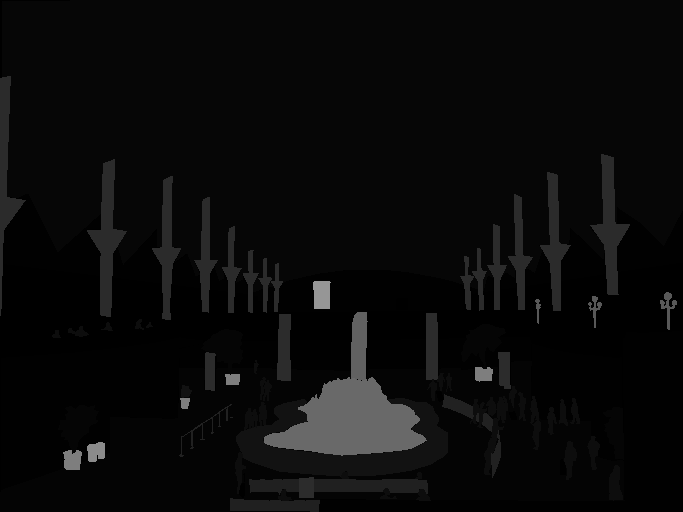

In [12]:
mask